## Table of Content
### Data Overview
* [0. Importing Libraries](#c0)
* [1. Importing Data and Pre-processing](#c1)
### Machine Learning 
* [2. Machine Learning - Unsupervised](#c2)
* [3. Machine Learning - Supervised](#c3)

## Data Overview

### 0. Importing Libraries <a class="anchor" id="c0"></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans
from pickle import dump

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

-----------------------------------------------------

### 1. Importing Data and Pre-processing <a class="anchor" id="c1"></a>

In [7]:
# Importing our dataset 
df = pd.read_csv('../data/raw/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# We keep only the features that we need 
df = df[['MedInc', 'Latitude', 'Longitude']]
df.head(3)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24


In [9]:
# Dividing our dataset on train and test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=123)
X_train.head(3)

,MedInc,Latitude,Longitude
9950,4.5694,38.38,-122.33
3547,5.6392,34.26,-118.60
4448,1.7292,34.07,-118.21


-----------------------------------------------------

### 2. Machine Learning - Unsupervised <a class="anchor" id="c2"></a>

In [12]:
# Training our model 
model = KMeans(n_clusters=6, random_state=123)
model.fit(X_train)
dump(model, open(f"../models/KMeans_unsupervised_model.sav", "wb"))
X_train['cluster'] = list(model.labels_)
X_train

,MedInc,Latitude,Longitude,cluster
9950,4.5694,38.38,-122.33,0
3547,5.6392,34.26,-118.60,4
4448,1.7292,34.07,-118.21,1
6984,4.6226,33.96,-118.02,4
4432,2.4375,34.08,-118.20,1
...,...,...,...,...
7763,3.6389,33.91,-118.10,1
15377,4.5391,33.37,-117.24,4
17730,5.6306,37.33,-121.76,0
15725,3.8750,37.78,-122.44,2


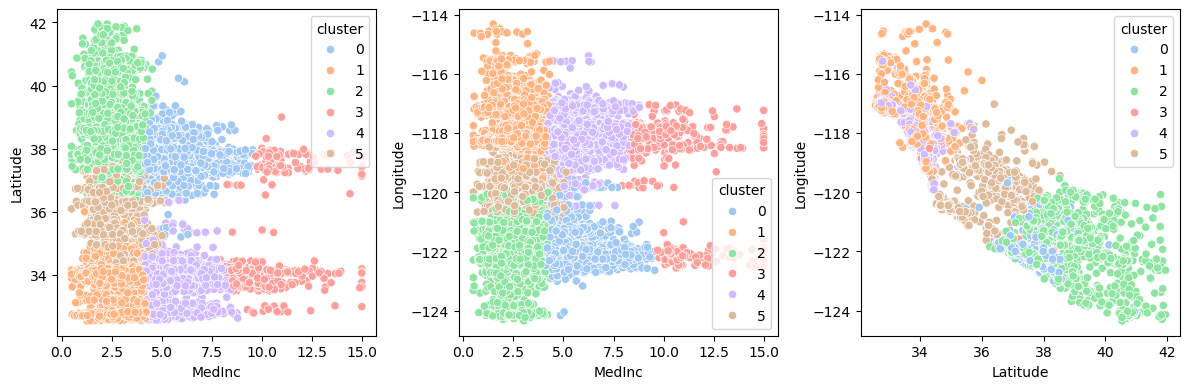

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

sns.scatterplot(ax= ax[0], data = X_train, x = 'MedInc', y='Latitude', hue='cluster', palette='pastel')
sns.scatterplot(ax = ax[1], data = X_train, x = 'MedInc', y='Longitude', hue='cluster', palette='pastel')
sns.scatterplot(ax = ax[2], data = X_train, x = 'Latitude', y='Longitude', hue='cluster', palette='pastel')

plt.tight_layout()
plt.show()

In [14]:
# Prediction now for X_test
X_test['cluster'] = model.predict(X_test)
X_test.head(3)

,MedInc,Latitude,Longitude,cluster
19121,3.7917,38.24,-122.64,2
20019,4.0217,36.09,-119.05,5
15104,4.0882,32.85,-116.98,1


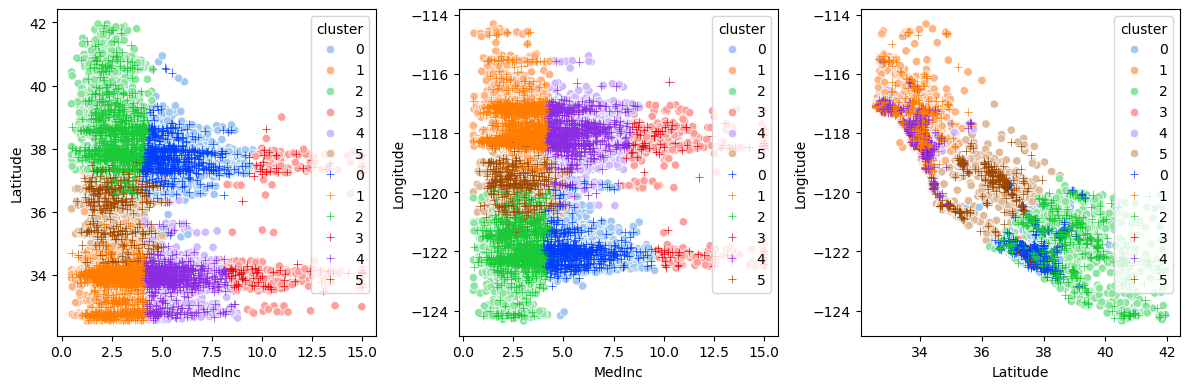

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

sns.scatterplot(ax= ax[0], data = X_train, x = 'MedInc', y='Latitude', palette='pastel', hue='cluster')
sns.scatterplot(ax = ax[1], data = X_train, x = 'MedInc', y='Longitude', palette='pastel', hue='cluster')
sns.scatterplot(ax = ax[2], data = X_train, x = 'Latitude', y='Longitude', palette='pastel', hue='cluster')

sns.scatterplot(ax= ax[0], data = X_test, x = 'MedInc', y='Latitude', hue='cluster', palette='bright', marker='+')
sns.scatterplot(ax = ax[1], data = X_test, x = 'MedInc', y='Longitude', hue='cluster', palette='bright',marker='+')
sns.scatterplot(ax = ax[2], data = X_test, x = 'Latitude', y='Longitude', hue='cluster', palette='bright',marker='+')

plt.tight_layout()
plt.show()

**Conclusions**
- In general, the predictions (+) align fairly well with the clusters identified by the original model (circles) as most of the '+' markers fall within the corresponding clusters of circles, which indicates that the predictions are reasonably consistent with the original clustering model.

-----------------------------------------------------

### 3. Machine Learning - Supervised <a class="anchor" id="c3"></a>

In [19]:
y_train = X_train['cluster']
X_train = X_train.drop(columns='cluster')
y_test = X_test['cluster']
X_test = X_test.drop(columns='cluster')

In [20]:
supv_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=123), 
    'RandomForestClassifier': RandomForestClassifier(random_state=123), 
    'XGBClassifier': XGBClassifier(random_state=123, device='cuda')
}

results = []

for name, model in supv_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred
    dump(model, open(f"../models/{name}_model.sav", "wb"))
    results.append(
        {
            'Model': name, 
            'Accuracy': accuracy_score(y_test, y_pred)
        }
    )

results = sorted(results, key=lambda x: x['Accuracy'], reverse=True)
bmodel = results[0].get('Model')
best_accuracy = results[0].get('Accuracy')

print(f'Our best model is {bmodel} with an accuracy of {round(best_accuracy*100,2)}%')

Our best model is RandomForestClassifier with an accuracy of 99.52%
